In [1]:
import scipy.io as scio 
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage.color import rgb2grey
from sklearn.feature_extraction import image
import skimage.measure
from sklearn import cluster, datasets, mixture
from sklearn.decomposition import PCA 
import matplotlib.cm as cm

In [2]:
pavia = {'rgb': scio.loadmat('PaviaRGB.mat')['PaviaRGB'],
         'color_map' : scio.loadmat('PaviaColorMap.mat')['PaviaColorMap'],
         'ground_truth' : scio.loadmat('PaviaGrTruth.mat')['PaviaGrTruth'],
         'ground_truth_mask' : scio.loadmat('PaviaGrTruthMask.mat')['PaviaGrTruthMask'],
         'wavelengths' : scio.loadmat('PaviaWavelengths.mat')['PaviaWavelengths'],
        }
sanbar = {'rgb': scio.loadmat('SanBarRGB.mat')['SanBarRGB'],
          'wavelengths': scio.loadmat('SanBarWavelengths.mat')['WaveLengths'],
          'hyperimage': scio.loadmat('SanBarHyperIm.mat')['SanBarIm88x400'],
         }

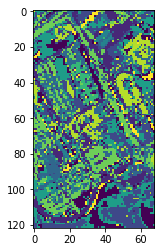

In [16]:
Img = pavia['rgb']
downsample = ski.measure.block_reduce(Img, (5,5,1), np.max)
[l,w,h] = downsample.shape
down = downsample.reshape(l*w,h)
sp = cluster.SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity="nearest_neighbors")
sp.fit_predict(down)
labels = sp.labels_
outlabels = labels.reshape(l,w)
plt.imshow(outlabels)

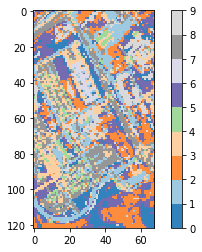

In [17]:
def label_show(im):
    """Displays input image with color"""
    cmap = cm.get_cmap('tab20c', 9)
    plt.imshow(im, cmap=cmap, vmin=0, vmax=9)
    plt.colorbar(ticks=np.linspace(0,9,10))
    plt.show()

label_show(outlabels)